<h2>FINAL PROJECT: A TUTORIAL</h2>
<h4>PROJECT TOPIC</h4> 

<h1> Homicide in USA : Supplementary Homicide Report from 1976 to 2017</h1>

# Name :      Denis
# Last Name:  Tra
<h4>CMSC 320 Summer 2021</h4>


<h3>OVERVIEW</h3>

Homicides happen everyday in our lives. It is important to be aware of increasing crime rate in the US in order to implement safety measurements. From that, this tutorial introduces a deep analysis on homicide reports in the US. The tutorial includes three main parts:

Part 1:

Data collecting and data cleaning processes. 

Part 2: 

Demonstrate how to analyze the given data and display          visualization. 

Part 3:  

Linear regression model to process the analysis and verify the hypotheses implied from it.

<h3>Required Tools</h3>
I recommend using Jupyter Notebook since Python is included and it is a great editor for data analysis but if you feel like using Visual Studio Code, go for it. You will also need the following libraries:

    pandas
    numpy
    scikit-learn
    matplotlib
    folium

<h2> OUTLINE</h2>
<h2>Part 1</h2>
<h4>1.1 Data Overview</h4>


<h4>1.2 Data Tidying</h4>

<h2>Part 2</h2>
<h4>2.1 Homicide By Year</h4>

<h4>2.1.1 Extract the Homicide Number Per Year</h4>

<h4>2.1.2 Visualize Homicides Number With Year</h4>

<h4>2.1.3 Interpretation</h4>

<h4>2.1.4 Statistic Data</h4>

<h4>2.1.5 Interpretation</h4>

<h4>2.2 Homicide By State</h4>

<h4>2.2.1 Extract the Homicide Number Per State</h4>

<h4>2.2.2 Visualize Homicide Number With States With Graph</h4>

<h4>2.2.3 Interpretation</h4>

<h4>2.2.4 Visualize Homicides Number With States With Map</h4>

<h4>2.3 Number of Offenders By Age</h4>

<h4>2.3.1 Extract the Homicides Number by Age</h4>

<h4>2.3.2 Visualize Homicide Number by Age</h4>

<h4> 2.3.3 Interpretation </h4>

<h2>Part 3</h2>

<h4>3.1 Linear Regression on Homicide by Years</h4>
<h4>3.2 Fitting the Linear Regression Model</h4>
<h4>3.3 Hypothesis Definition </h4>
<h4>3.4 Hypothesis Testing</h4>

<h2>Conclusion</h2>

<h2>Resources</h2>

<h2>Part 1: Data Preparation</h2>
<p>The first thing we need to do is download the dataset.

The file downloaded will be in form of a CSV (comma-separated value) called SHR76_17.csv. Then, I loaded the file to my Jupyter Notebook in order to process the data within it, I also renamed it data.csv. Pandas libraries will be helpfull to initialize the data in nice frames and columns. 

In [24]:
!pip install folium
import pandas as pd
import numpy as np
import folium
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import os

In [25]:
# Load the file and make frame
table = pd.read_csv("Data/data.csv", dtype=object)
# Display the table
table.head(3)

,ID,CNTYFIPS,State,Agency,Agentype,Source,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,MSA
0,197601001AKASP00,"Juneau, AK",Alaska,State Troopers,Primary state LE,FBI,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,55,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,Rural Alaska
1,197601001AL00102,"Jefferson, AL",Alabama,Birmingham,Municipal police,FBI,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,67,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",Alabama,Fairfield,Municipal police,FBI,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,53,Male,Black,Shotgun,Wife,Other,"Birmingham-Hoover, AL"


<h3>1.1 Data Overview</h3>
This table contains some crucial information for me to analyze such as the year, locations, crimetypes, weapons, victim, and the offender information.

<h3>1.2 Data Tidying</h3>
When I look at the data table, there are several columns that seem to be unnecessary to my knowledge such as the Agency , Agency Type, Source, VicRace, OffRace, Circumstance, Relationship and MSA. In this case, I drop these columns since I do not need them for my analysis.

In [26]:
# Droping some the columns
table = table.drop(['Agency', 'Agentype', 'Source', 'VicRace', 'OffRace', 'Circumstance', 'Relationship', 'MSA'], axis=1)
table.head(3)

,ID,CNTYFIPS,State,Solved,Year,Homicide,Situation,VicAge,VicSex,OffAge,OffSex,Weapon
0,197601001AKASP00,"Juneau, AK",Alaska,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,55,Female,Knife or cutting instrument
1,197601001AL00102,"Jefferson, AL",Alabama,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,67,Male,Shotgun
2,197601001AL00104,"Jefferson, AL",Alabama,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,53,Male,Shotgun


In [27]:
# Let conver the year into an int since it is number column
table['Year'] = table['Year'].str.replace(")", "").astype(int)

/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  



Next, in order to serve the purpose of the analysis, I separate victims and offenders into two different tables. Note that in order to identify the case for each row, I will use ID column to do that for each table.

In [28]:
# Creating victime table
victim = pd.DataFrame(table[['ID', 'CNTYFIPS', 'State', 'Year', 'Homicide', 'Situation', 'VicAge', 'VicSex']])

# Changing the age type columns
victim['VicAge'] = victim['VicAge'].str.replace(")", "").astype(int)
victim.head(3)

/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


,ID,CNTYFIPS,State,Year,Homicide,Situation,VicAge,VicSex
0,197601001AKASP00,"Juneau, AK",Alaska,1976,Murder and non-negligent manslaughter,Single victim/single offender,48,Male
1,197601001AL00102,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,65,Male
2,197601001AL00104,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,45,Female


In [29]:
# Renaming some of the columns 
victim = victim.rename(columns={'CNTYFIPS':'City', 'VicAge':'Victim Age', 'VicSex':'Victim Sex'})
victim.head(3)

,ID,City,State,Year,Homicide,Situation,Victim Age,Victim Sex
0,197601001AKASP00,"Juneau, AK",Alaska,1976,Murder and non-negligent manslaughter,Single victim/single offender,48,Male
1,197601001AL00102,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,65,Male
2,197601001AL00104,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,45,Female


If I look at the original table, there might be some cases that were unsolved and also the offender age should be a concern. In these cases, the identity of the offender's could be unknown but it happened to have victims. Therefore, since I am separating victims and offenders, it makes sense if I cut off the rows that have cases unsolved with offender's age concern.

In [30]:
# Creating offender table
offender = pd.DataFrame(table[['ID', 'CNTYFIPS', 'State', 'Year', 'Homicide', 'Situation', 'Solved', 'OffAge', 'OffSex', 'Weapon']])

# Cutting off any cases that were unsolved
offender = offender[offender['Solved'] != 'No']

# Cutting off ant cases that offender age is a concern
offender = offender[offender['OffAge'] != '0']

# Changing the age column type
offender['OffAge'] = offender['OffAge'].str.replace(")", "").astype(int)
offender.head(3)

/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


,ID,CNTYFIPS,State,Year,Homicide,Situation,Solved,OffAge,OffSex,Weapon
0,197601001AKASP00,"Juneau, AK",Alaska,1976,Murder and non-negligent manslaughter,Single victim/single offender,Yes,55,Female,Knife or cutting instrument
1,197601001AL00102,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,Yes,67,Male,Shotgun
2,197601001AL00104,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,Yes,53,Male,Shotgun


In [31]:
# Renaming some columns 
offender = offender.rename(columns={'CNTYFIPS':'City', 'OffAge':'Offender Age', 'OffSex':'Offender Sex'})
offender.head(3)

,ID,City,State,Year,Homicide,Situation,Solved,Offender Age,Offender Sex,Weapon
0,197601001AKASP00,"Juneau, AK",Alaska,1976,Murder and non-negligent manslaughter,Single victim/single offender,Yes,55,Female,Knife or cutting instrument
1,197601001AL00102,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,Yes,67,Male,Shotgun
2,197601001AL00104,"Jefferson, AL",Alabama,1976,Murder and non-negligent manslaughter,Single victim/single offender,Yes,53,Male,Shotgun


<h2>Part 2: Data Analysis and Visualization</h2>
<p>At this point, the data is ready to analyze. In this part, I would like to visualize the data I just cleaned up with some plots and map in order to portray and explain the trend of homicides to the audience. Also, statistical measurement for this data will be  included as well.</p>
<h3>2.1 Homicide By Year</h3>
<p>First, what I would like to analyze is the number of homicides happened through years from 1976 to 2017. I would like to know how this number changed every year in that period and explain the trend of these homicides?</p> 
<h4>2.1.1 Extract the Homicide Number Per Year</h4>
<p>The data currently has many cases belong to a specific year. The question to ask is: How can I count the number of homicides of a year in that period? Fortunately, pandas' groupby function will help me do the trick. 
 
The code below will demonstrate how I count the number of homicides per year based on our data.</p>

In [32]:
# Use groupby and count functions to count how many homicides in a year
table_a_year = table.copy().groupby(table['Year'], as_index=True, group_keys=True).count()

# Put indexes into the result table
number_by_year = table_a_year[['ID']].reset_index()

# Instead of ID, Count should be the name of the column
number_by_year = number_by_year.rename(index=str, columns={'ID' : 'Number'})
number_by_year.head(3)

,Year,Number
0,1976,17619
1,1977,18844
2,1978,19523


<h4>2.1.2 Visualize Homicides Number With Year</h4>
<p>Now I have successfully extracted the count of how many homicides happened for each year in the period. The next task to do is plotting a graph using the Year and Number column in the table I did above. One of the great library for this task is matplotlib which allows us to have nice graphs with given a dataset. More information can be found at https://matplotlib.org/. The code below will show you how.</p>

/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


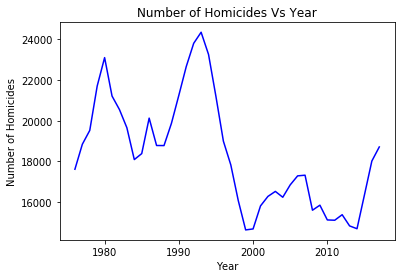

In [33]:
# Getting the data in plot
plt.plot(number_by_year['Year'], number_by_year['Number'], color='blue')

# Label y-axis
plt.ylabel('Number of Homicides')

# Label x axis 
plt.xlabel('Year')

# Give the title of the plot
plt.title('Number of Homicides Vs Year')

# Draw the graph
plt.show()

<h4>2.1.3 Interpretation</h4>

<p>The trend for the number of homicides seems to decrease in general. The number of homicides reached maximum in the period from 1990 to 1995 especially 1994 which has the largest number of homicides. After that, the number devreases until 2014 where the number of homicides is the smallest. It has a pick around 2017.</p>
<h4>2.1.4 Statistic Data</h4>
<p>Let have some basic statistic for the number of homicides for all years in the period from 1976 to 2017.</p>


In [34]:
print("Each year the average of homicides is: " + str(number_by_year['Number'].mean()) + " homicides/year")
print("The standard deviation of number of homicides is: " + str(number_by_year['Number'].std()))

Each year the average of homicides is: 18357.738095238095 homicides/year
The standard deviation of number of homicides is: 2747.946000636802


<h4>2.1.5 Interpretation</h4>

It can be said that the number of homicides is high in average which is 18357 cases per year. 

Also, the difference between years is quite large, which is showed by a large standard deviation: 2747.9460.


<h3>2.2 Homicide By State</h3>
<p>It is interesting to know how many homicides happened in each state in the US. Now, I want to introduce how homicides distribute in the US with some visualization.</p> 
<h4>2.2.1 Extract the Homicide Number Per State</h4>
<p>I use the same strategy as 2.1.1 but with State column.</p>

In [35]:
table_by_state = table.copy().groupby(table['State'], as_index=True, group_keys=True).count()
number_by_state = table_by_state[['ID']].reset_index()
number_by_state = number_by_state.rename(index=str, columns={'ID' : 'Number'})
number_by_state.head(3)

,State,Number
0,Alabama,16262
1,Alaska,2029
2,Arizona,14968


<h4>2.2.2 Visualize Homicide Number in States With Graph</h4>
<p>I have successfully plotted the line graph of homicide number with year. 

Now,I do similar task but I will use horizontal bar plot in order to show the homicide raport number in states.</p>

Text(0.5, 1.0, 'State Vs Number of Homicides')

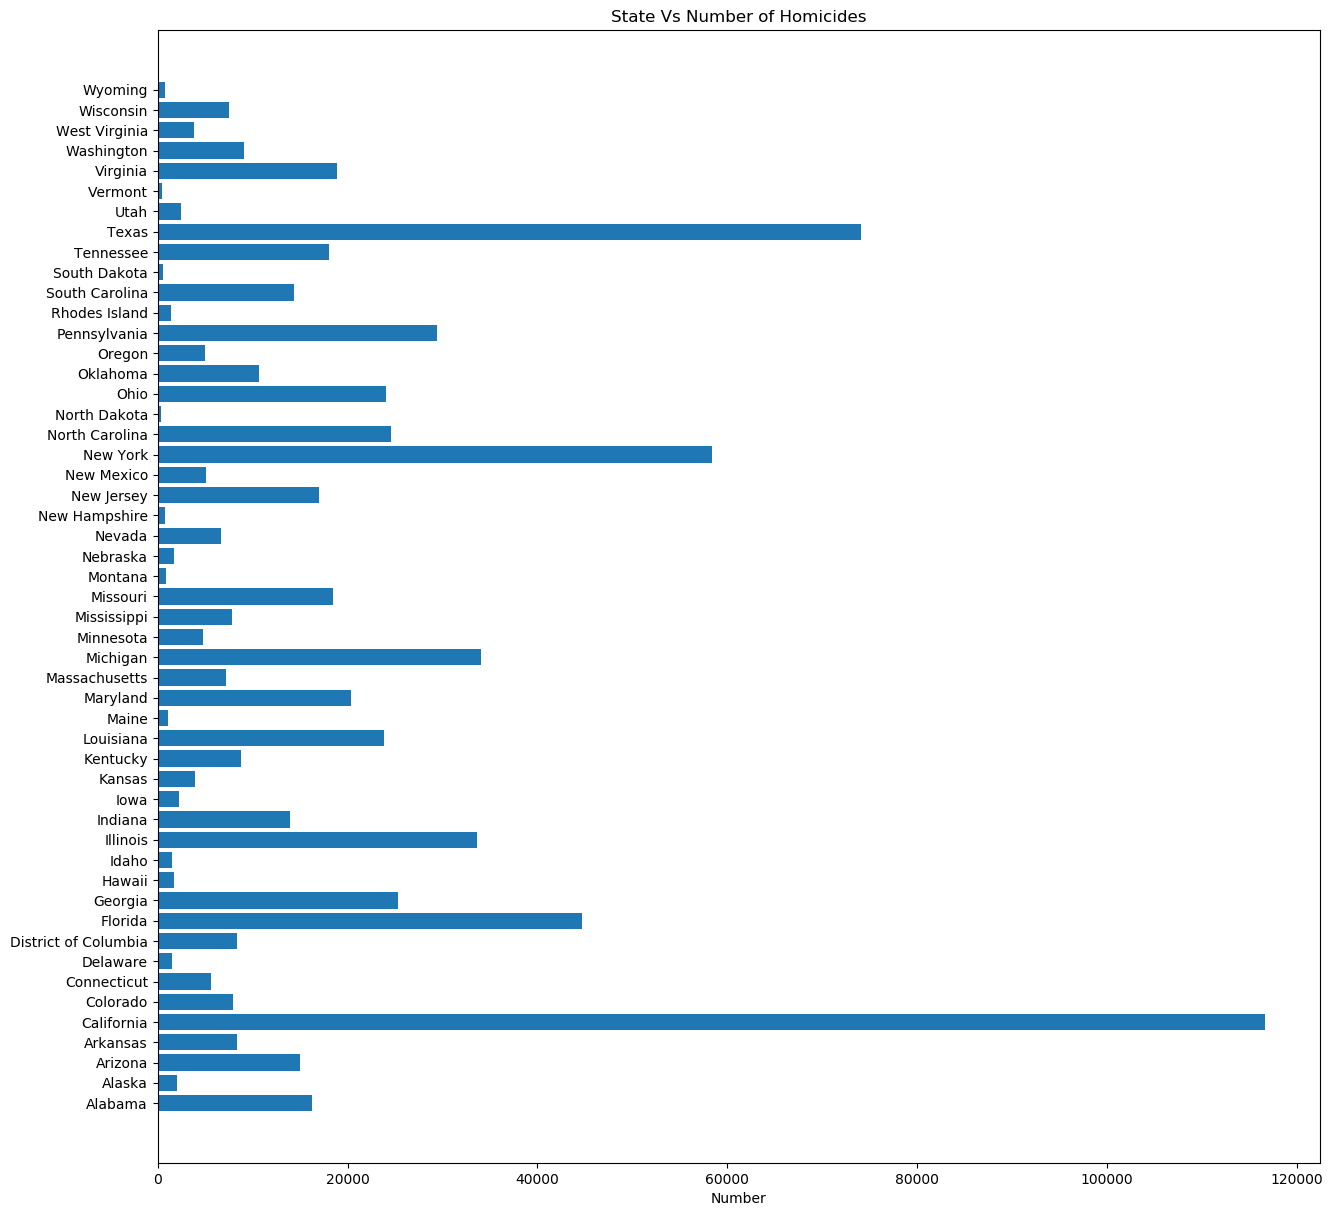

In [36]:
%matplotlib inline

# Initialize the size of the plot
plt.figure(figsize=(15, 15), dpi=100);

# Convert the State column to a numpy array
y_pos = np.arange(len(number_by_state['State']))

# Put the data into the plot
plt.barh(y_pos, number_by_state['Number'])

# Label y-axis
plt.yticks(y_pos, number_by_state['State'])

# Label x-axis
plt.xlabel('Number')

# Create title of the plot
plt.title('State Vs Number of Homicides')

<h4>2.2.3 Interpretation</h4>

Intuitively, when I look at the graph, the number of homicides in each state seems to be proportional with the size and population of that state. In the graph, it shows that California has the largest number of homicides in that period. The runner-up is Texas and so on. Small number of homicides only happened in small states (in term of size and population) such as Montana, North Dakota, South Dakota, Maine.
<h4>2.2.4 Visualize Homicides Number With States With Map</h4>
<p>I would like to illustrate the number of homicides percentage by state on map. Python has a library called folium. In general, folium is a library that allows users to play with maps. 

In this section, I want to introduce folium's choropleth map in order to illustrate our data. In order to do this, we will need a file called us-states.json which is a geo json file contains the boundaries of the US States. The purpose of using this file lets us color the states based on the number of homicides. 
 
 I will demonstrate how to make the map using the code below.</p>

In [37]:
# Get the percentages of all states over the total of number of homicides
number_by_state['Percentage'] = number_by_state['Number']*100/number_by_state['Number'].sum()

# Some visualization optimization
# Make path for the json file
state_geo = os.path.join('Data/us-states.json')

# Make the map with a start location and zoom size
d = folium.Map(location=[48, -100], zoom_start=4)

# Add choropleth layer in the map using the json file
# Import data from the number_by_state DataFrame with State and Percentage columns
# Set the keys on the state names
# Put in basic features such as color, opacities, legend_name.
# Reset
d.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=number_by_state,
    columns=['State','Percentage'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Homicides (%)',
    reset=True
)
folium.LayerControl().add_to(d)
d

/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<h3>2.3 Number of Offenders By Age</h3>
<p>The last analysis I would like to do is the number of Offenders by age. The analysis plays an important role of determining the average age of Offenders. This piece of information is useful for everyone to understand why Offenders at a certain age acts as murderers.</p>
<h4>2.3.1 Extract the Homicides Number by Age</h4>
<p>I will use same strategy as 2.1.1 but I will use the Offenders table.</p>

In [38]:
table_Off_by_age = offender.copy().groupby(offender['Offender Age'], as_index=True, group_keys=True).count()
number_by_Off_age = table_Off_by_age[['ID']].reset_index()
number_by_Off_age = number_by_Off_age.rename(index=str, columns={'ID' : 'Number'})
number_by_Off_age.head(3)

,Offender Age,Number
0,1,4
1,2,3
2,3,9


<h4>2.3.2 Visualize Homicide Number by Age</h4>
<p>I will visualize the data I retrieved above using the strategy in 2.3.2 but it will be better if I do vertical bar this time.</p>

Text(0.5, 1.0, 'Age Vs Number of Homicides')

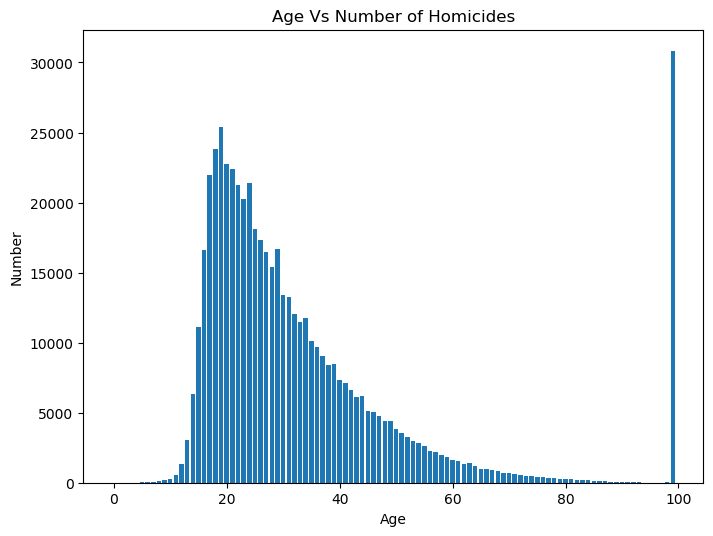

In [39]:
plt.figure(figsize=(8, 6), dpi=100);
y_pos = np.arange(len(number_by_Off_age['Offender Age']))
plt.bar(y_pos, number_by_Off_age['Number'])
plt.ylabel('Number')
plt.xlabel('Age')
plt.title('Age Vs Number of Homicides')

In [40]:
print("The average age of a Offender is: " + str(sum(number_by_Off_age['Number']*number_by_Off_age['Offender Age'])/ \
                                                    number_by_Off_age['Number'].sum()) + " years old")

The average age of a Offender is: 85.7570708749938 years old


<h4> 2.3.3 Interpretation </h4>

<p>The large number of offend happened to be around 18 to 40. After 30, the number of offender decreases as the age get larger and get a pick around in the 90. This comes to the fact that a offender's average age is around 85. Also in the graph, the age range that has the most offenders is from 19 to 40 which seems the age range where kids trying to find their way in adulthood.</p>

<h2>Part 3: Linear Regression and Hypothesis Test</h2>
<p>Now that I have the analysis done I can start doing linear regression and test the predictions. When doing a linear regression, I am taking data that is already there and predicting future data base on the patterns of the data I already have. I am going to take a linear regression of just the Homicide vs Year data and compare it to another regression when taking account States using a f test. 

And I predict that if I can account many factors, we will be able to have more accurate predictions.</p>
<h3>3.1 Linear Regression on Homicide by Years</h3>
<p>I will start creating the linear regression model for Homicide Number vs Years. I will be using the Linear Regression model library to create the model and to get our predicted values.</p>

[-138.17300057]
294220.1337276828
[21190.28460687]
[21052.1116063]
[20913.93860573]
[20775.76560516]
[20637.5926046]
[20499.41960403]
[20361.24660346]
[20223.0736029]
[20084.90060233]
[19946.72760176]
[19808.55460119]
[19670.38160063]
[19532.20860006]
[19394.03559949]
[19255.86259893]
[19117.68959836]
[18979.51659779]
[18841.34359722]
[18703.17059666]
[18564.99759609]
[18426.82459552]
[18288.65159495]
[18150.47859439]
[18012.30559382]
[17874.13259325]
[17735.95959269]
[17597.78659212]
[17459.61359155]
[17321.44059098]
[17183.26759042]
[17045.09458985]
[16906.92158928]
[16768.74858872]
[16630.57558815]
[16492.40258758]
[16354.22958701]
[16216.05658645]
[16077.88358588]
[15939.71058531]
[15801.53758474]
[15663.36458418]
[15525.19158361]
/Users/dtrabi07/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array befor

Text(0.5, 1.0, 'Homicide Number vs Year with Linear Regression')

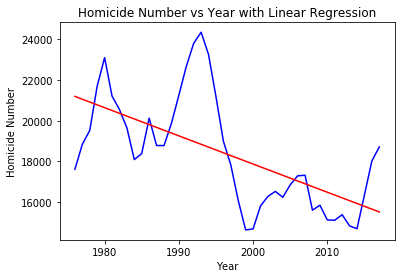

In [41]:
# Let plot This table in Graphs
# Linear Regression 
# Using np to reshape the x array
reg = linear_model.LinearRegression()
X  = [x for x in number_by_year['Year'].values]
X = np.asarray(X)
Y = [y for y in number_by_year['Number'].values]
regfit = reg.fit(X.reshape(-1, 1), Y)

# Print the regfit coef and intercep
print(regfit.coef_)
print(regfit.intercept_)

# Get predcited Values
pred_homicides = []
for x in number_by_year['Year'].values:
    
    # Print the refit array 
    print(regfit.predict(x.reshape(-1, 1)))
    # append to the pre_homicide
    pred_homicides.append(regfit.predict(x.reshape(-1, 1)))

    # Pred_homicides.append(regfit.predict([[1980]]))
number_by_year['pred_homicides'] = pd.Series(pred_homicides, index = number_by_year.index)

# Plot the linear regression line with the data
plt.plot(number_by_year['Year'], number_by_year['Number'], color='blue',)
plt.plot(number_by_year['Year'], number_by_year['pred_homicides'], color='red')
plt.xlabel("Year")
plt.ylabel("Homicide Number")
plt.title("Homicide Number vs Year with Linear Regression")

<h3>3.2 Fitting the Linear Regression Model</h3>
<p>First I would need to create a new table that will group the data by Year and State so that I can get the number homicides associated with those columns. Next I would like to fit the data I had to the linear regression model. In order to do this I will be using the ols regression library to retrieve the linear regression formula. 

<p>In this section, I would like to fit two different linear regressions. 

* First is the regression with both year and state as factors.

* Second is the regression with count associate with year.


 Here is the result for the first regression:</p>

In [42]:
# Create new table with copy of table
table_by_state_year = table.copy()
# Get year and state columns
table_by_state_year  = table_by_state_year[['Year','State']]
# Get the count associated with year and state
table_by_state_year = table_by_state_year.groupby(['Year','State']).size()
table_by_state_year = table_by_state_year.reset_index()
# Rename count column
table_by_state_year['Number'] = table_by_state_year[0]
table_by_state_year = table_by_state_year.drop(0,1)
# Fit the second regression
# The First linear regression requires not only year 
# but it also accounts for the states that these homicides happened.
regression1 = ols(formula='Number ~ Year + State + Year * State', data=table_by_state_year).fit()
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Number   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     330.9
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:51:51   Log-Likelihood:                -13219.
No. Observations:                2117   AIC:                         2.664e+04
Df Residuals:                    2015   BIC:                         2.722e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           6041.3251   3246.269      1.861      0.063    -325.069    1.24e+04
State[T.Alaska]                    -5800.0146   4590.917     -1.263      0.207   -1.48e+04    3203.426
State[T.Arizona]                   -1.641e+04   4590.917     -3.574      0.000   -2.54e+04   -7406.401
State[T.Arkansas]                  -4316.2035   4590.917     -0.940      0.347   -1.33e+04    4687.237
State[T.California]                 6.168e+04   4590.917     13.436      0.000    5.27e+04    7.07e+04
State[T.Colorado]                  -4788.1311   4590.917     -1.043      0.297   -1.38e+04    4215.310
State[T.Connecticut]               -3712.4897   4590.917     -0.809      0.419   -1.27e+04    5290.951
State[T.Delaware]                  -7015.6086   4590.917     -1.528      0.127    -1.6e+04    1987.832
State[T.District of Columbia]       -104.7531   4674.033     -0.022      0.982   -9271.195    9061.689
State[T.Florida]                   -2388.9457   4626.687     -0.516      0.606   -1.15e+04    6684.644
State[T.Georgia]                   -7894.0073   4590.917     -1.719      0.086   -1.69e+04    1109.434
State[T.Hawaii]                    -4204.4680   4590.917     -0.916      0.360   -1.32e+04    4798.973
State[T.Idaho]                     -5638.2518   4590.917     -1.228      0.220   -1.46e+04    3365.189
State[T.Illinois]                   2.454e+04   4590.917      5.345      0.000    1.55e+04    3.35e+04
State[T.Indiana]                   -6712.2487   4590.917     -1.462      0.144   -1.57e+04    2291.192
State[T.Iowa]                      -6166.5034   4596.862     -1.341      0.180   -1.52e+04    2848.596
State[T.Kansas]                    -4856.8832   4594.188     -1.057      0.291   -1.39e+04    4152.971
State[T.Kentucky]                    582.4631   4605.071      0.126      0.899   -8448.735    9613.661
State[T.Louisiana]                 -1428.8614   4590.917     -0.311      0.756   -1.04e+04    7574.580
State[T.Maine]                     -5830.9319   4601.141     -1.267      0.205   -1.49e+04    3192.560
State[T.Maryland]                  -9566.3124   4590.917     -2.084      0.037   -1.86e+04    -562.871
State[T.Massachusetts]             -3491.4097   4590.917     -0.761      0.447   -1.25e+04    5512.031
State[T.Michigan]                   1.754e+04   4590.917      3.820      0.000    8533.373    2.65e+04
State[T.Minnesota]                 -7202.4297   4590.917     -1.569      0.117   -1.62e+04    1801.011
State[T.Mississippi]               -3657.3872   4590.917     -0.797      0.426   -1.27e+04    5346.054
State[T.Missouri]                  -6030.4270   4590.917     -1.314      0.189    -1.5e+04    2973.014
State[T.Montana]                   -6240.9548   4613.299     -1.353      0.176   -1.53e+04    28

<h3>3.3 Hypothesis Definition </h3>

Hypothesis testing is a statistical method of determining if your created model is a good fit or not. You want to set up your hypothesis such that you reject the null hypothesis. This is where significance level comes into the picture. When setting up your experiment, in addition to the hypotheses, you set a significance level. While determining whether to reject your null hypothesis or not, be careful to determine what type of test you are setting up. I wil use f-Test in my hypothesis statement.

<h3>3.4 Hypothesis Testing</h3>
<p>In order to verify my hypothesis, I would like to introduce f-test. The purpose of this test is to verify my linear regression models fit the data well. 

Also, f-test can be carried out by a technique called ANOVA. The demostration below uses this technique. 

In [43]:
# Fit the second regression
regression2 = ols(formula='Number ~ Year', data=table_by_state_year).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Number   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.703
Date:                Wed, 14 Jul 2021   Prob (F-statistic):            0.00321
Time:                        13:52:01   Log-Likelihood:                -16249.
No. Observations:                2117   AIC:                         3.250e+04
Df Residuals:                    2115   BIC:                         3.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5849.2942   1859.340      3.146      0.002    2202.967    9495.621
Year          -2.7473      0.931     -2.950      0.003      -4.574      -0.921
==============================================================================
Omnibus:                     1498.319   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20611.165
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      16.812   Cond. No.                     3.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second linear regression requires only year that these homicides happened. Therefore, we predict that if we includes state as another factor, in first linear then this linear regression model will be more accurate. Here is the second one but we also need to sanitize our data a little bit by counting the number of homicides by year and state:

In [44]:
# Running ANOVA with regression 1
result1 = sm.stats.anova_lm(regression1, typ=2)
result1

,sum_sq,df,F,PR(>F)
State,5.212815e+08,50.0,639.098219,0.000000e+00
Year,2.428612e+06,1.0,148.875549,4.351889e-33
Year:State,2.153768e+07,50.0,26.405490,1.872095e-182
Residual,3.287076e+07,2015.0,NaN,NaN


In [45]:
# Run ANOVA with regression 2
result2 = sm.stats.anova_lm(regression2, typ=2)
result2

,sum_sq,df,F,PR(>F)
Year,2.368884e+06,1.0,8.702929,0.003212
Residual,5.756899e+08,2115.0,NaN,NaN


<p>Based on our f-test information of the two linear regression models, when you take a look at the PR(>F) column of the test data, the regression model that takes both state and year as factors has a really small value for that column compared to the other linear regression model that just takes year as a factor. Therefore the model that takes both year and state as a factor will provide us with the most accurate predictions.</p>

<h2>Conclusion</h2>
<p>It is important to be aware of how many lives are endangered by homicides and the trend of these homicide cases goes throughout the year and its distrbution. This tutorial is an example of how we can use data science to help the audience be more aware about what is happening in our lives which many of us have not paid attention to or been aware of.</p>
<p>Base on the dataset that I have here, I can conclude that the amount of homicides differ by year and state. I can also be relieved that the amount of homicides has been decreasing with each year passing. It can also be seen that in the more populous states such as California and Texas, homicides happen more frequently.</p>
<p>The dataset that I used contains a lot of information, not just the amount of homicides per year or state, but also the information of individual victims and offenders.

If you do not feel the will to live anymore, you should call 911 before doing anything silly.

Life is the most beautifull thing that We as Human Being have so let Cherry Life.</p>

<h2>Resources and usefull Links to this topic</h2>
<ul>

https://www.kaggle.com/ryanvolkert/supplementary-homicide-report

https://pandas.pydata.org/pandas-docs/stable/

https://www.datacamp.com/community/blog/python-pandas-cheat-sheet

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://explorable.com/f-test

http://www.statsmodels.org/stable/index.html

https://matplotlib.org/